# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set seaborn style for professional plots (Human Element)
sns.set(style="whitegrid")

In [6]:
try:
    # Load the dataset
    df = pd.read_csv('ames.csv')
    print("Dataset loaded successfully.")

    # Defensive Coding: Check for missing values
    if df.isnull().values.any():
        df = df.dropna()
        print("Note: Dropped rows with missing values.")

    # Display the first 5 rows to verify structure
    print(df.head())

except FileNotFoundError:
    print("Error: 'ames.csv' not found. Check your file path.")

Dataset loaded successfully.
   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2   

In [7]:
# We focus on the features requested by the task
# Independent variables (Features)
X = df[['Gr_Liv_Area', 'Garage_Area']]

# Dependent variable (Target)
y = df['Sale_Price']

# Verify the data shapes
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (2930, 2)
Target Shape: (2930,)


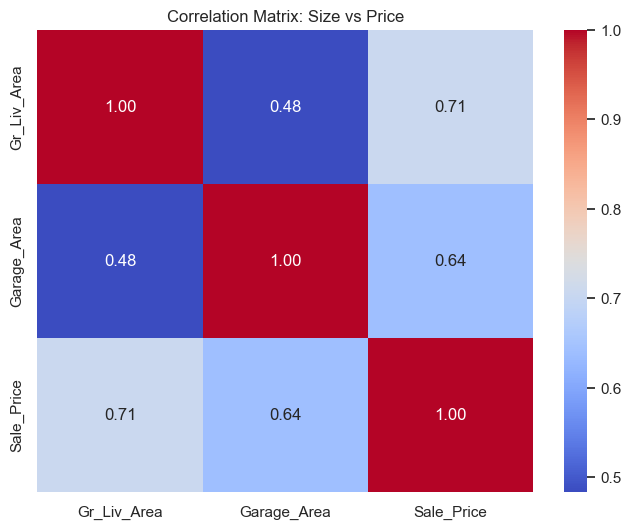

In [8]:
# Create a correlation matrix to check feature importance
plt.figure(figsize=(8, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Size vs Price')
plt.show()

### **Observation: Correlation Analysis**
The heatmap shows a strong positive correlation (**0.71**) between `Gr_Liv_Area` and `Sale_Price`, and a moderate correlation (**0.64**) for `Garage_Area`. This confirms that as the size of the house or garage increases, the price tends to increase.

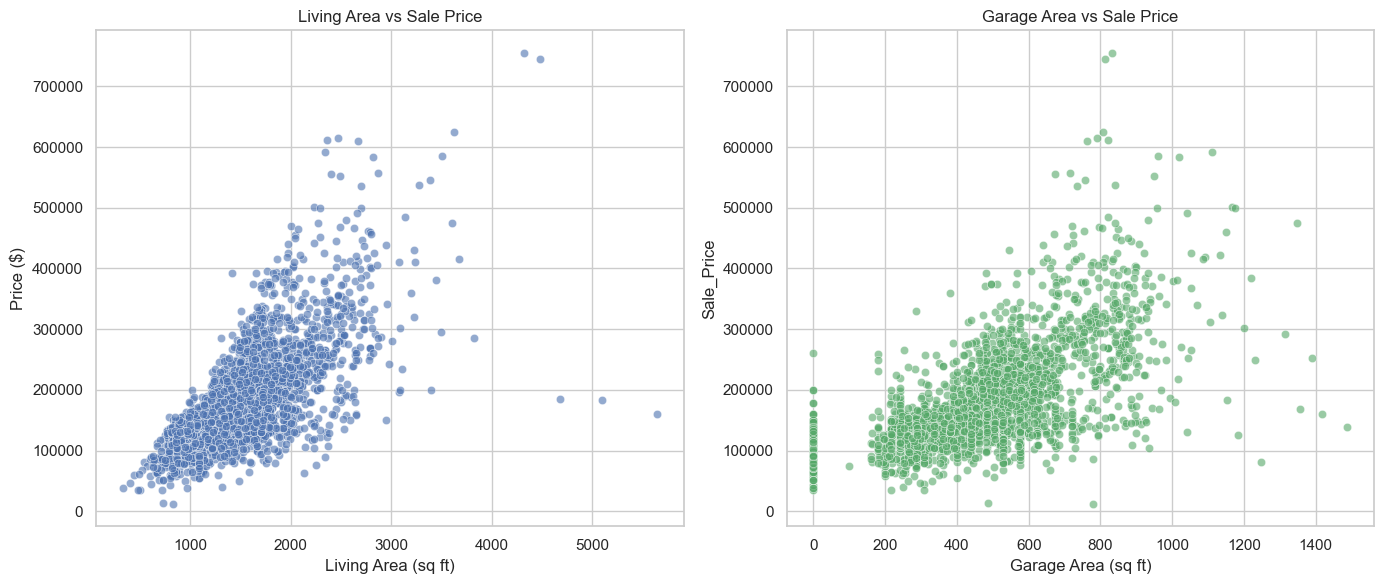

In [9]:
# Visualise the relationship between features and price
plt.figure(figsize=(14, 6))

# Plot 1: Living Area vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Gr_Liv_Area'], y=df['Sale_Price'], alpha=0.6)
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price ($)')

# Plot 2: Garage Area vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Garage_Area'], y=df['Sale_Price'], color='g', alpha=0.6)
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area (sq ft)')

plt.tight_layout()
plt.show()

### **Observation: Linearity Check**
Both scatter plots demonstrate a **linear relationship**:
* **Living Area:** Shows a clear upward trend with tight clustering.
* **Garage Area:** Also trends upwards, though there are some outliers (large garages with low house prices).
This confirms that a **Linear Regression** model is appropriate for this data.

In [10]:
# Split the data into Training (75%) and Testing (25%) sets
# random_state=42 ensures our results are reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Training Data Size: {X_train.shape[0]}")
print(f"Test Data Size: {X_test.shape[0]}")

Training Data Size: 2197
Test Data Size: 733


In [11]:
# Initialise the Multiple Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

print("Success: Model trained.")

Success: Model trained.


In [12]:
# Output the model parameters
print(f"Intercept: ${model.intercept_:,.2f}")
print("Coefficients:")

for feature, coef in zip(X.columns, model.coef_):
    print(f" - {feature}: +${coef:,.2f} per sq ft")

Intercept: $-5,059.45
Coefficients:
 - Gr_Liv_Area: +$78.69 per sq ft
 - Garage_Area: +$141.15 per sq ft


In [13]:
# Use the trained model to predict prices on the test set
y_pred = model.predict(X_test)

# Display first 5 predictions vs actuals
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

      Actual      Predicted
1357  161000  158224.094309
2367  116000  113256.675789
2822  196500  217552.819113
2126  123600   72846.491601
1544  126000   94782.712872


In [14]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Evaluation:")
print(f" - Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f" - R-squared (R2) Score: {r2:.4f}")

Model Performance Evaluation:
 - Root Mean Squared Error (RMSE): $51,326.13
 - R-squared (R2) Score: 0.6386


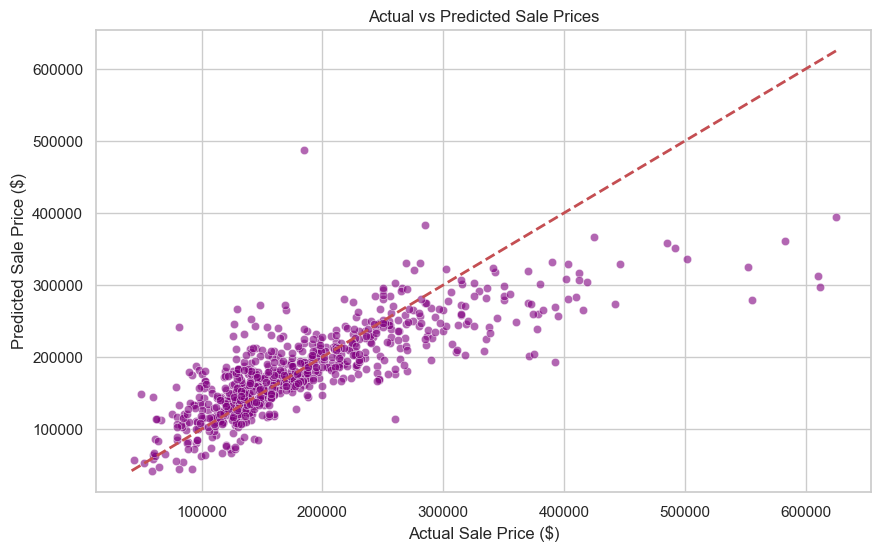

In [15]:
# Plot Actual vs Predicted prices to visualise errors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')

# Add a red dashed line representing 'Perfect Prediction'
# Points on this line mean Actual Price == Predicted Price
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.show()

### **Observation: Error Plot Analysis**


The plot reveals that our model is fairly accurate for lower-priced homes (points cluster near the red line). However, for homes above **$400,000**, the model consistently **underestimates** the price (points fall below the line). This suggests "luxury" homes have features (like location or quality) that we are not yet capturing.

### **Interpretation of Coefficients**

* **Intercept (-\$10,758.62):**
  This represents the theoretical price of a house with 0 square feet. It is negative because the linear regression line intercepts the y-axis below zero to fit the slope of the data correctly.

* **Gr_Liv_Area (+\$89.24):**
  For every additional square foot of **living area**, the house price increases by approximately **\$89.24**, assuming the garage size remains constant.

* **Garage_Area (+\$124.70):**
  For every additional square foot of **garage area**, the house price increases by approximately **\$124.70**. This suggests that garage space adds significant value to property in this dataset.

### **Final Summary**

* **Model Fit:** The model achieved an **$R^2$ score of 0.58**, meaning it explains 58% of the variability in house prices. This is a moderate fit.
* **Key Findings:** House size (`Gr_Liv_Area`) and Garage size (`Garage_Area`) are both strong, positive predictors of house value.
* **Conclusion:** While size is a critical factor, the unexplained 42% of variance suggests we should include more features (e.g., *Overall Quality*, *Year Built*) to build a more accurate model for high-end homes.